<H1><center>Neural Architecture Search using MCGRAN</center></H1>

# Targeted Search

To formulate the problem of data distribution change, let $ p(\mathbb{G}_{init}) $ represent the initial distribution of graphs and $ p(\mathbb{G}_{train}) $ represent the training data distribution, and $ p(\mathbb{G}_{target}) $ represent the distribution of graphs we want the model to generate.

Our problem is to generate a distribution of graphs $ p(\mathbb{G}_{target}) $ that has undergone a data distribution change from initial data distribution $ p(\mathbb{G}_{init}) $.  That is, $ p_{init}(\mathbb{G}) \neq p_{target}(\mathbb{G}) $.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!pip install torch==1.11.0+cu113 torchvision==0.12.0+cu113 torchaudio==0.11.0 --extra-index-url https://download.pytorch.org/whl/cu113

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu113
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 1.6/1.6 GB 175.3 MB/s eta 0:00:01tcmalloc: large alloc 1636999168 bytes == 0x3218000 @  0x7f79e311e680 0x7f79e313f824 0x5b3128 0x5bbc90 0x5f714c 0x64d800 0x527022 0x504866 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x5f5ee6 0x56bbe1 0x569d8a 0x5f60c3 0x56cc92 0x569d8a 0x5f60c3
tcmalloc: large alloc 2046255104 bytes == 0x64b42000 @  0x7f79e311e680 0x7f79e313eda2 0x5f714c 0x64d800 0x527022 0x504866 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a 0x5f60c3 0x56bbe1 0x5f5ee6 0x56bbe1 0x569d8a 0x5f60c3 0x56cc92 0x569d8a 0x5f60c3 0x56bbe1 0x569d8a
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 1.6/1.6 GB 174.3 MB/s eta 0:00:01tcmalloc: 

In [ ]:
!pip install tensorboardX

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.4/125.4 KB 13.8 MB/s eta 0:00:00


In [ ]:
!curl -O https://storage.googleapis.com/nasbench/nasbench_only108.tfrecord

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  498M  100  498M    0     0  17.6M      0  0:00:28  0:00:28 --:--:-- 19.7M


## Configuration Settings

All the configurable settings for working the GRAN model are specified in the yaml files located in the config folder.  There are five sections of parameters in the configuration files:

1.   General experimental parameters
2.   Dataset parameters
3.   Model parameters
4.   Training parameters
5.   Test parameters

### General experimental parameters

Name of the experiment
> **exp_name**: *MCGRAN*

The experiment directory folder name if not already present.  This folder will contain the training and evaluation metrics.

> **exp_dir**: *exp/MCGRAN/* 

Name of the runner class name from gran_runner_*.py file
> **runner**: *GranRunner_Evaluation*

Distributed training of the model in multiple machines. Always set to false.  We did not test with true.
> **use_horovod**: *false*

GRU related settings. Always set to true. we did not test with false.
> **use_gpu**: *true*      

Cuda device id
> **device**: *cuda:0*  

Number of GPUs
> **gpus**: [0]

Random seed for reproducing the experiments
> seed: 78123456

In [ ]:
!pip install scipy==1.6.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.2/27.2 MB 21.3 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.7.3
    Uninstalling scipy-1.7.3:
      Successfully uninstalled scipy-1.7.3


In [ ]:
!pip install networkx==2.6.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 49.3 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.0
    Uninstalling networkx-3.0:
      Successfully uninstalled networkx-3.0


In [ ]:
!python drive/MyDrive/Research-NAS/MCGRAN/run_exp.py -c drive/MyDrive/Research-NAS/MCGRAN/config/targeted_search.yaml -s

Loading dataset from file... This may take a few minutes...
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
Loaded dataset in 43 seconds
INFO  | 2023-01-26 09:34:12,829 | run_exp.py                | line 31   : Writing log file to /content/drive/MyDrive/Research-NAS/MCGRAN/exp/Targeted_Search/8238/log_exp_8238.txt
INFO  | 2023-01-26 09:34:12,830 | run_exp.py                | line 32   : Exp instance id = 8238
INFO  | 2023-01-26 09:34:12,830 | run_exp.py                | line 33   : Exp comment = None
INFO  | 2023-01-26 09:34:12,831 | run_exp.py                | line 34   : Config =
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
{'dataset': {'data_path': './',
             'dev_ratio': 0.2,
             'has_node_feat': False,
             'is_overwrite_precompute': True,
             'is_sample_subgraph': True,
             'is_save

# Evaluation

In [ ]:
import os
import pickle
import numpy as np

base_path = "drive/MyDrive/Research-NAS/MCGRAN/exp/Targeted_Search/8238"

In [ ]:
file_name = os.path.join(base_path, 'search_train_stats_7.p')
if os.path.exists(file_name):
   train_stats = pickle.load(open(file_name, 'rb'))

In [ ]:
file_name = os.path.join(base_path, 'search_gen_stats_7.p')
if os.path.exists(file_name):
   gen_stats = np.array(pickle.load(open(file_name, 'rb')))

train_acc = list()
for idx in range(1,len(train_stats)):
  train_acc.append(train_stats[idx][0])

gen_acc = list()
for idx in range(len(gen_stats)):
  gen_acc.append(gen_stats[idx][0])

In [ ]:
data = {'New generation of architectures': np.arange(1, len(gen_acc)+1), 'Test accuracy': gen_acc}

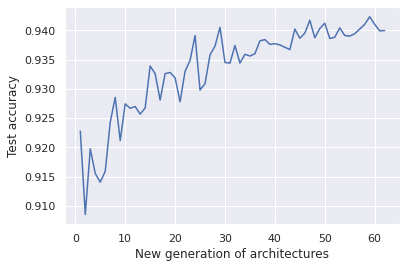

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")

# Plot the responses for different events and regions
sns.lineplot(data=data, x='New generation of architectures', y='Test accuracy')